In [82]:
!pip install photutils

In [83]:
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from photutils.detection import DAOStarFinder, IRAFStarFinder

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


16 (1880, 2760)


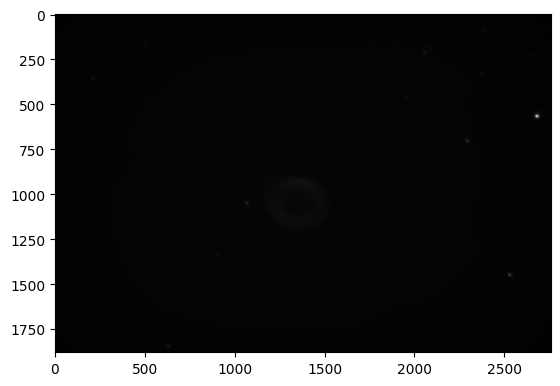

In [102]:
#fileName = "/content/drive/Shareddrives/UMBC Observatory/Observations/SharpCap Captures/2023-10-23/Seeing_hd209128/21_10_02/Seeing_hd209128_00001.fits"
#fileName = "/content/drive/Shareddrives/UMBC Observatory/Observations/SharpCap Captures/2023-10-18/ngc1501_v_300s_asi432mm/23_24_08/ngc1501_v_300s_asi432mm_00001.fits"
#fileName = "/content/drive/Shareddrives/UMBC Observatory/Observations/SharpCap Captures/2023-11-01/hd222603_seeing_ag_V/23_23_18/hd222603_seeing_ag_V_00001.fits"
fileName = "/content/drive/Shareddrives/UMBC Observatory/Observations/SharpCap Captures/2023-07-11/20230711_M57_180s_phd2ON/23_34_10/20230711_M57_180s_phd2ON_00001.fits"

# opens the given file
hduList = fits.open(fileName)

# takes first hdu
hdu = hduList[0]

# plots the image in grayscale
plt.imshow(hdu.data, cmap = 'gray')

# prints bit size and image dimensions
print(hdu.header["BITPIX"], hdu.data.shape)


In [103]:
# finding statistical values
mean, median, std, max = np.mean(hdu.data), np.median(hdu.data), np.std(hdu.data), np.max(hdu.data)
print(f"Data Mean: {mean}\nData Median: {median}\nData STD: {std}\nData Max: {max}")

Data Mean: 3813.1434129278446
Data Median: 3806.0
Data STD: 252.5430745688983
Data Max: 40579


In [104]:
skyBrightness = 500
starFind = DAOStarFinder(threshold=median, fwhm=20.0, sky=skyBrightness, exclude_border=True, brightest=10, peakmax=70000)
sources = starFind(hdu.data)
print(sources)

 id     xcentroid          ycentroid      ...  peak         flux        mag
--- ------------------ ------------------ ... ----- ------------------- ---
  1  2676.085200545825  567.2982711036591 ... 40079   -312452.328422065 nan
  2 2524.4115529794735 1449.3319139312048 ... 12698  -312487.5917172021 nan
  3 1065.3375668431613 1050.6458588722114 ...  8941  -312492.8961619966 nan
  4  2289.426676308321  704.3932785519914 ...  9005    -312493.02468764 nan
  5  627.7800094551866 1848.7678879388545 ...  7021  -312494.9941620457 nan
  6  2052.125688595679 215.82118655048404 ...  6326  -312496.1744598043 nan
  7 209.97255402380762 359.61402399349896 ...  5827 -312496.58360183786 nan
  8  2368.017414153856  333.8640234199324 ...  5395  -312497.1657620494 nan
  9  900.0124187256828  1339.180524318642 ...  5455  -312497.3646250511 nan
 10 1948.5448778472146 465.20717665650085 ...  5281 -312497.46266937046 nan


In [105]:
# This block checks how many sources are present in the image (max of 10)
# A source must have a peak value > 10*skyBrightness in sources array
numOfSources = 0
for x in sources:
  if x["peak"] > 10*skyBrightness:
    numOfSources = numOfSources + 1

print(numOfSources)

10


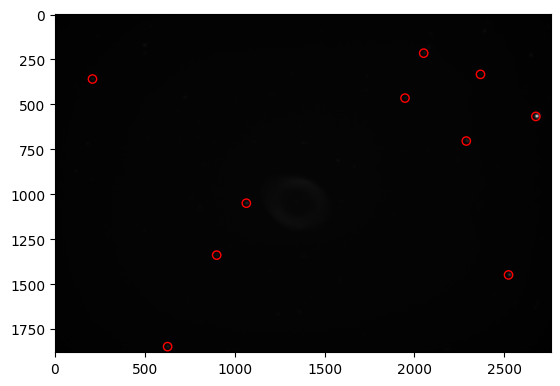

In [106]:
# plots the image again
plt.imshow(hdu.data, cmap='gray')

# places a ring around each source in the list
for source in sources[:numOfSources]:
  plt.scatter(int(source[1]), int(source[2]), facecolors='none', edgecolors='r')

In [107]:
# defining properties of a gaussian fit
def gauss(x, mu, sigma, amplitude, offset):
  return amplitude * np.exp(-((x-mu)/sigma)**2/2) + offset

Source 1
X1:
mu = 25.63490057324527
sigma = 6.322281272872186
 amp = 34135.10622655249
off = 5206.405928158103
fwhm = 14.88783467168321

Y1:
mu = 25.862947451720117
sigma = 5.740521144961722
 amp = 34432.900754927396
off = 5053.967574989749
fwhm = 13.51789426107988
-----
Source 2
X2:
mu = 25.977037893426424
sigma = -6.487932278713073
 amp = 8906.022832231909
off = 4123.411416238316
fwhm = -15.277912980716868

Y2:
mu = 25.922703905308804
sigma = 5.933049236548643
 amp = 9020.087351513619
off = 4068.307526385083
fwhm = 13.971263270380316
-----
Source 3
X3:
mu = 25.89118670227316
sigma = -6.442417803876229
 amp = 5095.31880096633
off = 4184.2912267420115
fwhm = -15.170734583032011

Y3:
mu = 26.19740511812427
sigma = -5.83035382206204
 amp = 5119.1131188707905
off = 4177.081870503434
fwhm = -13.729434049814502
-----
Source 4
X4:
mu = 26.10762413144345
sigma = 6.947591155829631
 amp = 5229.3401541951935
off = 4095.289385755198
fwhm = 16.360326918427358

Y4:
mu = 25.99416689455241
sigma = 6.

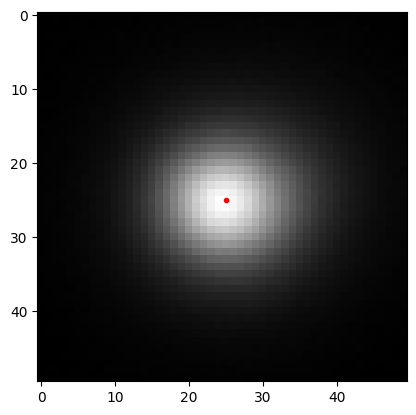

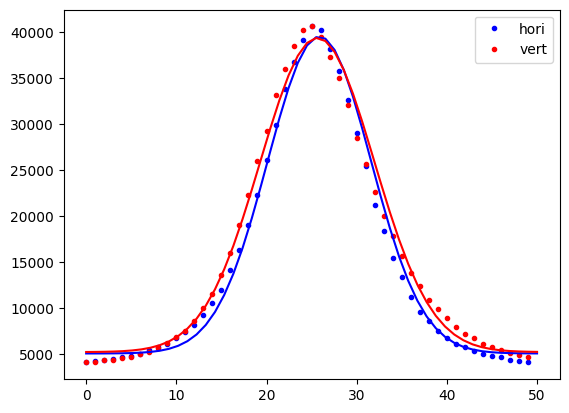

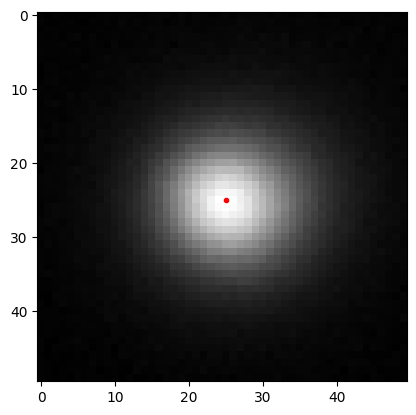

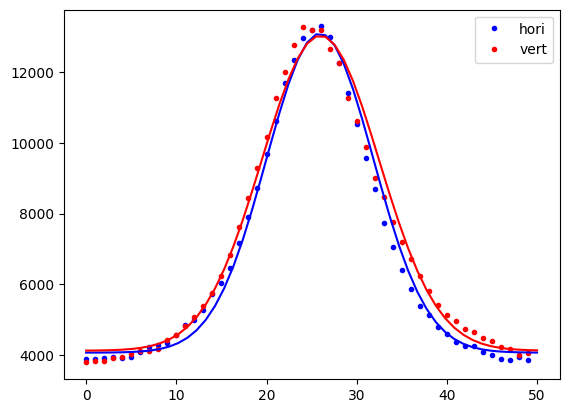

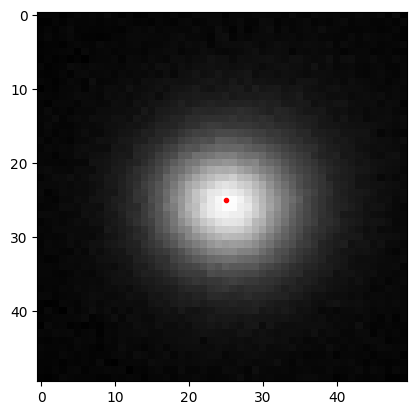

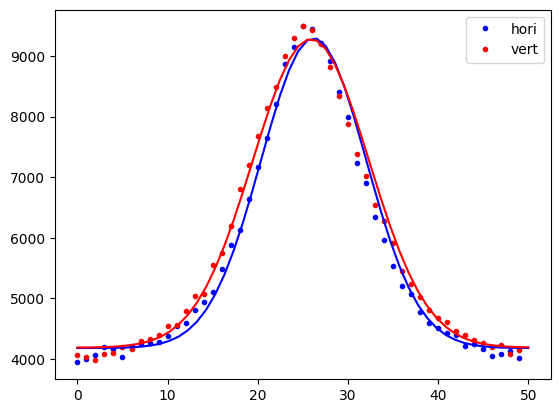

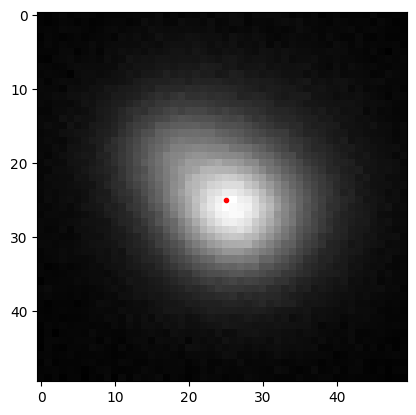

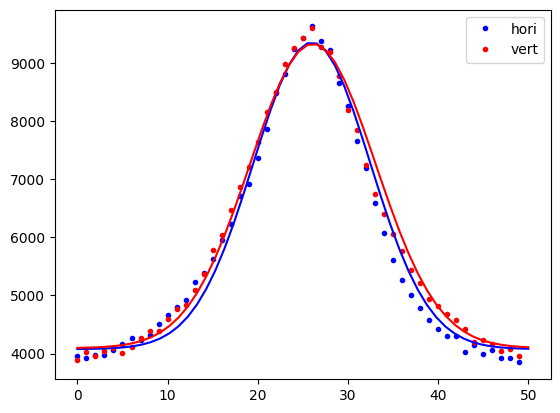

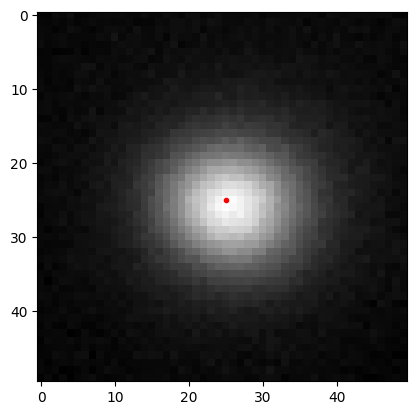

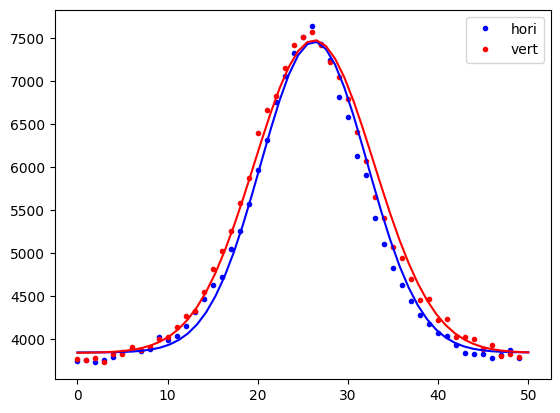

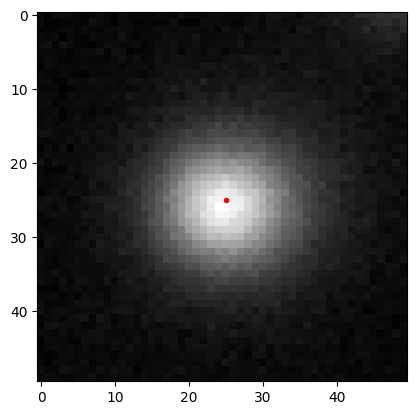

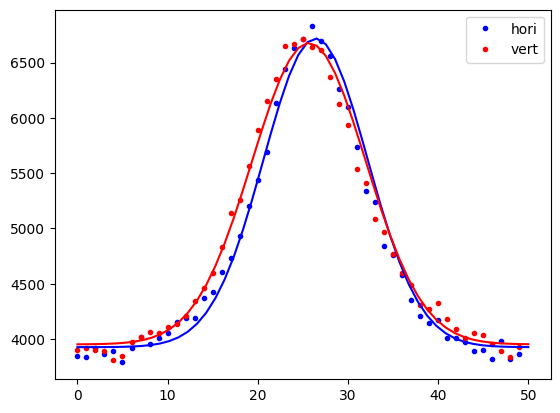

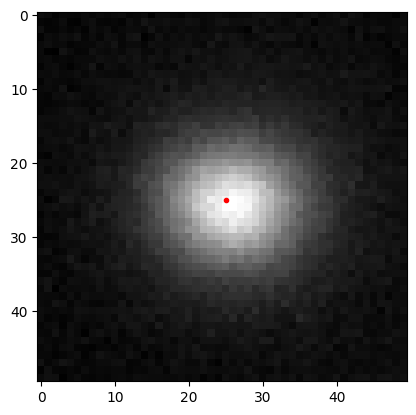

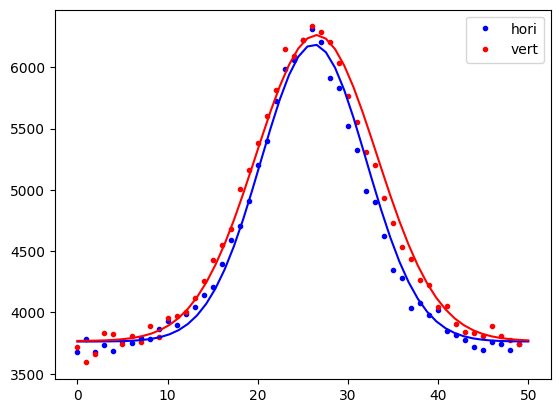

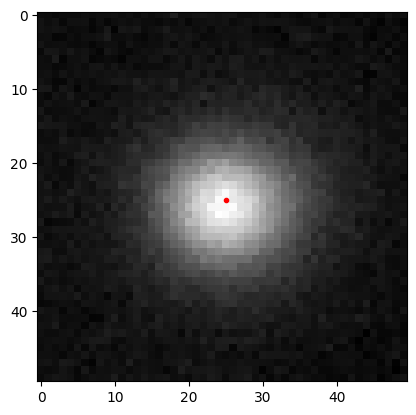

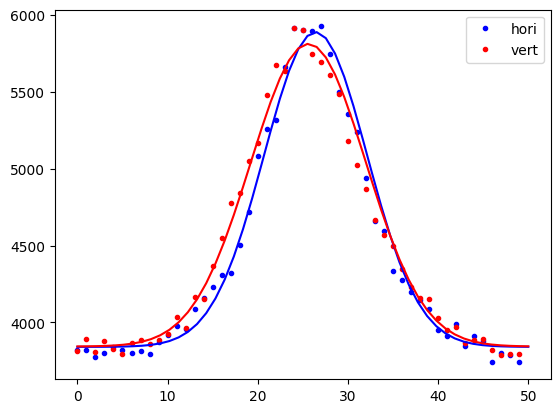

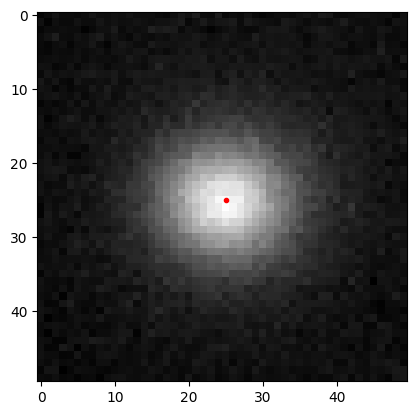

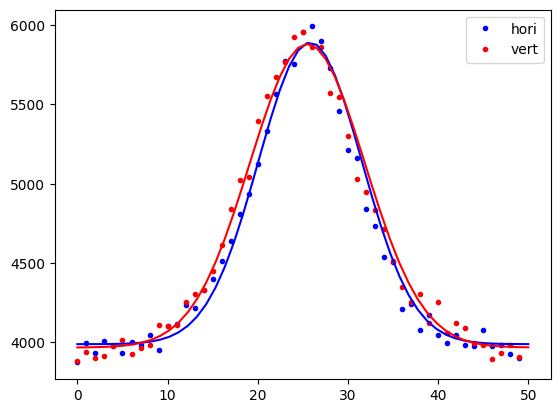

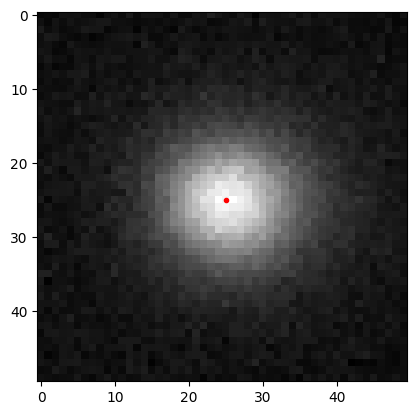

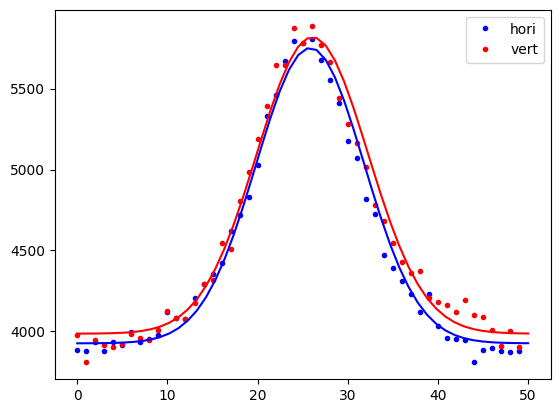

In [108]:
dx = int(50/2)
dy = int(50/2)
for source in sources[:numOfSources]:
  xMin, xMax = int(source['ycentroid']) - dx, int(source['ycentroid']) + dx
  #print(xMin, xMax)
  yMin, yMax = int(source['xcentroid']) - dy, int(source['xcentroid']) + dy
  #print(yMin, yMax)
  subFrame = hdu.data[xMin:xMax,yMin:yMax]

  xAxis = np.linspace(0,50,50)

  ansx = curve_fit(gauss, xdata=xAxis, ydata=subFrame[dx,:], p0=[50,20,1000,500])
  mux, sigmax, ampx, offx = ansx[0][0], ansx[0][1], ansx[0][2], ansx[0][3]

  ansy = curve_fit(gauss, xdata=xAxis, ydata=subFrame[:,dy], p0=[50,20,1000,500])
  muy, sigmay, ampy, offy = ansy[0][0], ansy[0][1], ansy[0][2], ansy[0][3]

  fwhmX = (2*pow(2*np.log(2), 0.5))*sigmax
  fwhmY = (2*pow(2*np.log(2), 0.5))*sigmay
  print(f"Source {source['id']}")
  print(f"X{source['id']}:\nmu = {mux}\nsigma = {sigmax}\n amp = {ampx}\noff = {offx}\nfwhm = {fwhmX}\n")
  print(f"Y{source['id']}:\nmu = {muy}\nsigma = {sigmay}\n amp = {ampy}\noff = {offy}\nfwhm = {fwhmY}\n-----")

  # prints image of the source currently showing
  plt.figure()
  plt.imshow(subFrame, cmap='gray')
  plt.plot(dx,dy,'r.')

  # prints the plot with gaussian fits
  plt.figure()
  plt.plot(subFrame[:, dy], 'b.', label='hori')
  plt.plot(subFrame[dx, :], 'r.', label='vert')
  plt.plot(xAxis, gauss(xAxis, muy, sigmay, ampy, offy), 'b-')
  plt.plot(xAxis, gauss(xAxis, mux, sigmax, ampx, offx), 'r-')
  plt.legend(loc=0)
